#  <span style="color:black">Exploratory Analyses in Python</span>

## <span style="color:orange">ANALYSES AND PYTHON CODE</span>

This script will show how to run exploratory analyses in Python. A [YouTube video](https://www.youtube.com/watch?v=htYV2S1KsnU), a script in the [R programming language](https://rrighart.github.io/RExplor/), and additional materials can be found at my [GitHub](https://rrighart.github.io) page.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = {'subject': ['Pierre','Anne','Joyce','Peter','Alan','Camille'], 'age': [20, 16, 19, 99, 23, 18], 'sex': ['M','F','F','M', np.nan, 'F'], 'height': [172, 181, 165, 168, 177, 178], 'speed': [11.20, 3.00, 11.50, 10.35, 10.98, 13.05]}

df = pd.DataFrame(data, columns = ['subject','age','sex','height','speed'])

In [3]:
df

,subject,age,sex,height,speed
0,Pierre,20,M,172,11.20
1,Anne,16,F,181,3.00
2,Joyce,19,F,165,11.50
3,Peter,99,M,168,10.35
4,Alan,23,NaN,177,10.98
5,Camille,18,F,178,13.05


In [4]:
df.shape

(6, 5)

In [5]:
df.head(4)

,subject,age,sex,height,speed
0,Pierre,20,M,172,11.20
1,Anne,16,F,181,3.00
2,Joyce,19,F,165,11.50
3,Peter,99,M,168,10.35


In [6]:
df.dtypes

subject     object
age          int64
sex         object
height       int64
speed      float64
dtype: object

Some basic statistics can be given by <b><span style="background-color:rgba(0, 0, 0, 0.0470588)"> describe</span></b>. Use <b><span style="background-color:rgba(0, 0, 0, 0.0470588)"> np.round(df.describe(), decimals=2) </span></b> for rounding to two decimals.

In [7]:
df.describe()

,age,height,speed
count,6.000000,6.000000,6.000000
mean,32.500000,173.500000,10.013333
std,32.660374,6.220932,3.551741
min,16.000000,165.000000,3.000000
25%,18.250000,169.000000,10.507500
50%,19.500000,174.500000,11.090000
75%,22.250000,177.750000,11.425000
max,99.000000,181.000000,13.050000


##  <span style="color:black">Missing values</span>

To inspect if and where there are missing values (NaN) in the data. The command <b><span style="background-color:rgba(0, 0, 0, 0.0470588)">df.isnull()</span></b> gives the same result.

In [8]:
pd.isnull(df)

,subject,age,sex,height,speed
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,True,False,False
5,False,False,False,False,False


If you want the row and column where NaNs occur. Please remind that Python indexing starts at zero, so the first row and first column are indexed "0".

In [9]:
np.where(pd.isnull(df))

(array([4]), array([2]))

##  <span style="color:black">Impossible extreme values</span>

We can use boxplots to see if there are impossible extreme values in the data.

Note that normally selecting the three variables in a boxplot, using the commands <b><span style="background-color:rgba(0, 0, 0, 0.0470588)">df[['age', 'height', 'speed']].boxplot()</span></b> and <b><span style="background-color:rgba(0, 0, 0, 0.0470588)">plt.show()</span></b>, would have been good solutions. But the problem here is that not the same scaling is used for the three measures. For this reason, one should make boxplots separately, shown side-by-side.

The <b><span style="background-color:rgba(0, 0, 0, 0.0470588)">add_subplot(x,y,z)</span></b> command is used for the positioning of the figures, where the first number denotes that there is one row, the second number denotes that there are three columns, and the third number denotes the position. The command <b><span style="background-color:rgba(0, 0, 0, 0.0470588)">fig.tight_layout()</span></b> is to regulate the spacing between figures.

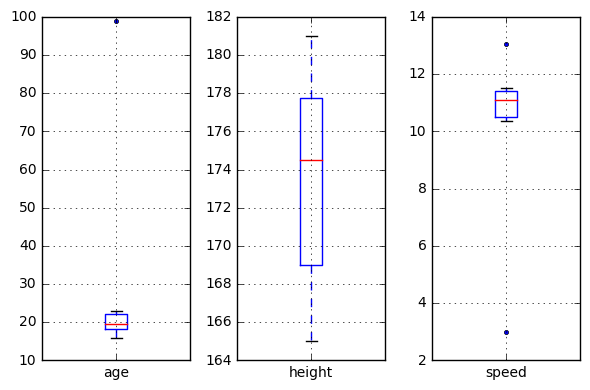

In [10]:
fig = plt.figure()

fig.add_subplot(1,3,1)
df[['age']].boxplot(sym='.')

fig.add_subplot(1,3,2)
df[['height']].boxplot(sym='.')

fig.add_subplot(1,3,3)
df[['speed']].boxplot(sym='.')

fig.tight_layout()
plt.show()

##  <span style="color:black">Finding & replacing extreme values manually</span>

Compute the mean before the removal of outliers:

In [11]:
df['age'].mean()

32.5

Check if there are cases that are older than 40 years:

In [12]:
df['age']>40

0    False
1    False
2    False
3     True
4    False
5    False
Name: age, dtype: bool

Replace the case(s) older than 40 with a missing value (NA).

In [13]:
df['age'][df['age']>40]=np.nan

In [14]:
df

,subject,age,sex,height,speed
0,Pierre,20.0,M,172,11.20
1,Anne,16.0,F,181,3.00
2,Joyce,19.0,F,165,11.50
3,Peter,NaN,M,168,10.35
4,Alan,23.0,NaN,177,10.98
5,Camille,18.0,F,178,13.05


In [15]:
df['age'].mean()

19.199999999999999

##  <span style="color:black">Inspecting mean age for male and female participants</span>

Mean age for male and female participants.

In [16]:
grpsex = df.groupby('sex')

In [17]:
grpsex['age'].mean()

sex
F    17.666667
M    20.000000
Name: age, dtype: float64

Again, use <b><span style="background-color:rgba(0, 0, 0, 0.0470588)"> np.round(grpsex['age'].mean(), decimals=2) </span></b> for rounding to two decimals.

##  <span style="color:black">Inspecting relations between variables</span>

Use a scatterplot to display the relation between age and speed:

In [18]:
df.iloc[1,4]=np.nan; # command used to make missing value of 3.00 ms

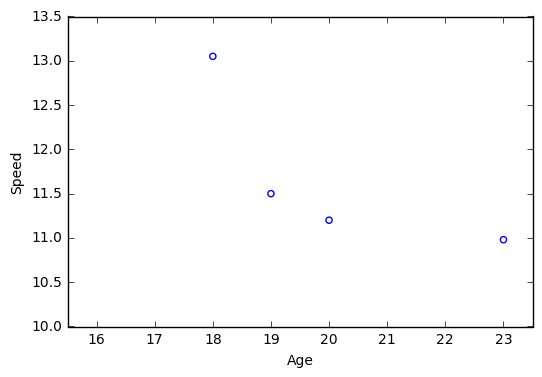

In [19]:
plt.scatter(df['age'], df['speed'], facecolors='none', edgecolors='b')
plt.xlim(15.5,23.5)
plt.ylim(10.0, 13.5)
plt.xlabel('Age')
plt.ylabel('Speed')
plt.show()

Note that the above figure are the data after the two outliers were replaced by NaN (as discussed in the [YouTube video](https://www.youtube.com/watch?v=htYV2S1KsnU)). So for this reason there are only four datapoints left.
Actually, up to now, we only replaced one outlier for Age with a NaN. See the Quiz question below for replacing the outlier in the variable *speed* with NaN.

## <span style="color:orange">QUIZ QUESTIONS AND ANSWERS</span>

##  <span style="color:black">Quiz Question I</span>

Replace the outlier of 3.00 ms in the variable *df$speed* with a NaN.

**Answer** There are multiple solutions possible:

In [20]:
df.iloc[1,4]=3.00;

In [21]:
df['speed'][df['speed']==3.00]=np.nan

Another solution:

In [22]:
df.iloc[1,4]=np.nan

To verify that the value was indeed replaced by NaN use the command <b><span style="background-color:rgba(0, 0, 0, 0.0470588)"> pd.isnull </span></b>

In [23]:
pd.isnull(df['speed'])

0    False
1     True
2    False
3    False
4    False
5    False
Name: speed, dtype: bool

##  <span style="color:black">Quiz Question II</span>

A dataset could erroneously have double records (duplicates). This is bad and should be removed.
Seeing the current dataset, what would be a way to discover duplicates in the variable *df$subject*?
Check your solution for the following data.frame that contains double data:

In [24]:
data = {'subject': ['Pierre','Anne','Joyce','Peter','Alan','Camille', 'Pierre'], 'age': [20, 16, 19, 99, 23, 18, 20], 'sex': ['M','F','F','M', np.nan, 'F', 'M'], 'height': [172, 181, 165, 168, 177, 178, 172], 'speed': [11.20, 3.00, 11.50, 10.35, 10.98, 13.05, 11.20]}

df = pd.DataFrame(data, columns = ['subject','age','sex','height','speed'])

**Answer**

A way to inspect for double records is to use the <b><span style="background-color:rgba(0, 0, 0, 0.0470588)">value_counts()</span></b> function. For this purpose, we need to transform the variable of interest to a *Pandas Series*.

In [25]:
dfsubject = pd.Series(df['subject'])

In [26]:
dfsubject.value_counts()

Pierre     2
Joyce      1
Alan       1
Peter      1
Anne       1
Camille    1
Name: subject, dtype: int64

But still simpler, using the <b><span style="background-color:rgba(0, 0, 0, 0.0470588)">describe</span></b> function would also show that Pierre has two records:

In [27]:
df['subject'].describe()

count          7
unique         6
top       Pierre
freq           2
Name: subject, dtype: object

##  <span style="color:black">CONTACT</span>

If you have any questions, please do not hesitate to contact me: *<span style="color:blue">rrighart@googlemail.com</span>*